# DATA CLEANING AND PREPROCESSING

## Steps 1 and 2 :  Identify the problem statement and collecting data, Loading data to the environment and importing libraries

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading both train_eda and test_eda files into dataframes
air_train_df, air_test_df = pd.read_csv("train.csv"), pd.read_csv("test.csv")

In [3]:
print("The number of rows in train.csv are:",air_train_df.shape[0])
print("The number of rows in test.csv are:",air_test_df.shape[0])

The number of rows in train.csv are: 103904
The number of rows in test.csv are: 25976


In [4]:
'''Concatenating both the dataframes into a single one. The resultant dataframe will have the rows of train.csv
followed by test.csv'''
f_df = pd.concat([air_train_df, air_test_df])
print("The number of rows after merging the two csv files:", f_df.shape[0])

The number of rows after merging the two csv files: 129880


In [5]:
# Shape function gives the number of rows and columns in the data frame.
f_df.shape

(129880, 25)

## Step 3:  Descriptive statistics of the data

Calculating various parameters of the data like mean, standard deviation, variance, interquartile range to get the statistical gist of each column.

In [6]:
# Descrptive statistics of data
f_df.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,44158.700000,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN
std,31207.377062,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16234.750000,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,38963.500000,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,71433.250000,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


## Step 4:  Dropping the unnecessary columns

In [7]:
# Let us print the first ten rows along with the header row.
f_df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


It is observed that the column 'id' just gives the row number which has no contribution in the feature set. 'id' is also such column which has no contribution in feature set as it is just the id number allocated to each individual. So these two columns can be dropped.

In [8]:
f_df = f_df.drop('Unnamed: 0', axis=1)
f_df = f_df.drop('id', axis=1)

## Step 5: Identifying the missing values

In [9]:
print(f_df.shape[0]) # to find total number of rows in the dataset
print(f_df.notna().all(axis=1).sum()) # to find the count of rows that do not have even a single missing value

129880
129487


From above, we infer that there are 393 (129880 - 129487) rows that must have even a single null value. So, let us look at the columns that are contributing for these null values.

In [10]:
print(f_df.isna().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


It is observed that there are 393 missing values in 'Arrival Delay in Minutes' column.

In [11]:
missing_all_coumns = f_df[f_df.isnull().any(axis=1)]     
print(missing_all_coumns['Arrival Delay in Minutes'])

213     NaN
1124    NaN
1529    NaN
2004    NaN
2108    NaN
         ..
24072   NaN
24133   NaN
24301   NaN
25128   NaN
25468   NaN
Name: Arrival Delay in Minutes, Length: 393, dtype: float64


## Step 6: Filling in the missing values

It is observed that "Arrival Delay in Minutes" is the only column that is contributing for these null values. Now we can look for the above statistics in order to know how to handle these values. These values can be filled in with the median values of the column instead of dropping the rows which is usually the opted method.

In [12]:
f_df['Arrival Delay in Minutes'].fillna(f_df['Arrival Delay in Minutes'].median(), inplace=True)

Now we can check if these null values are replaced by median values by printing the null rows. If there are no null rows, it means these null values are filled with new values.

In [13]:
print(f_df.isna().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


## Step 7: Checking for Duplicate rows

In [14]:
f_df.drop_duplicates(inplace=True)

In [15]:
f_df.shape

(129880, 23)

There are no duplicate rows, as the rows count size is still the same indicating there has been no dropping of rows.

## Step 8: Initial Chosing of Feature set to remove highly correlated features

Getting the values of each categorical column.

In [16]:
print(f_df['satisfaction'].unique())
print(f_df['Gender'].unique())
print(f_df['Customer Type'].unique())
print(f_df['Type of Travel'].unique())
print(f_df['Class'].unique())

['neutral or dissatisfied' 'satisfied']
['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']


<AxesSubplot:>

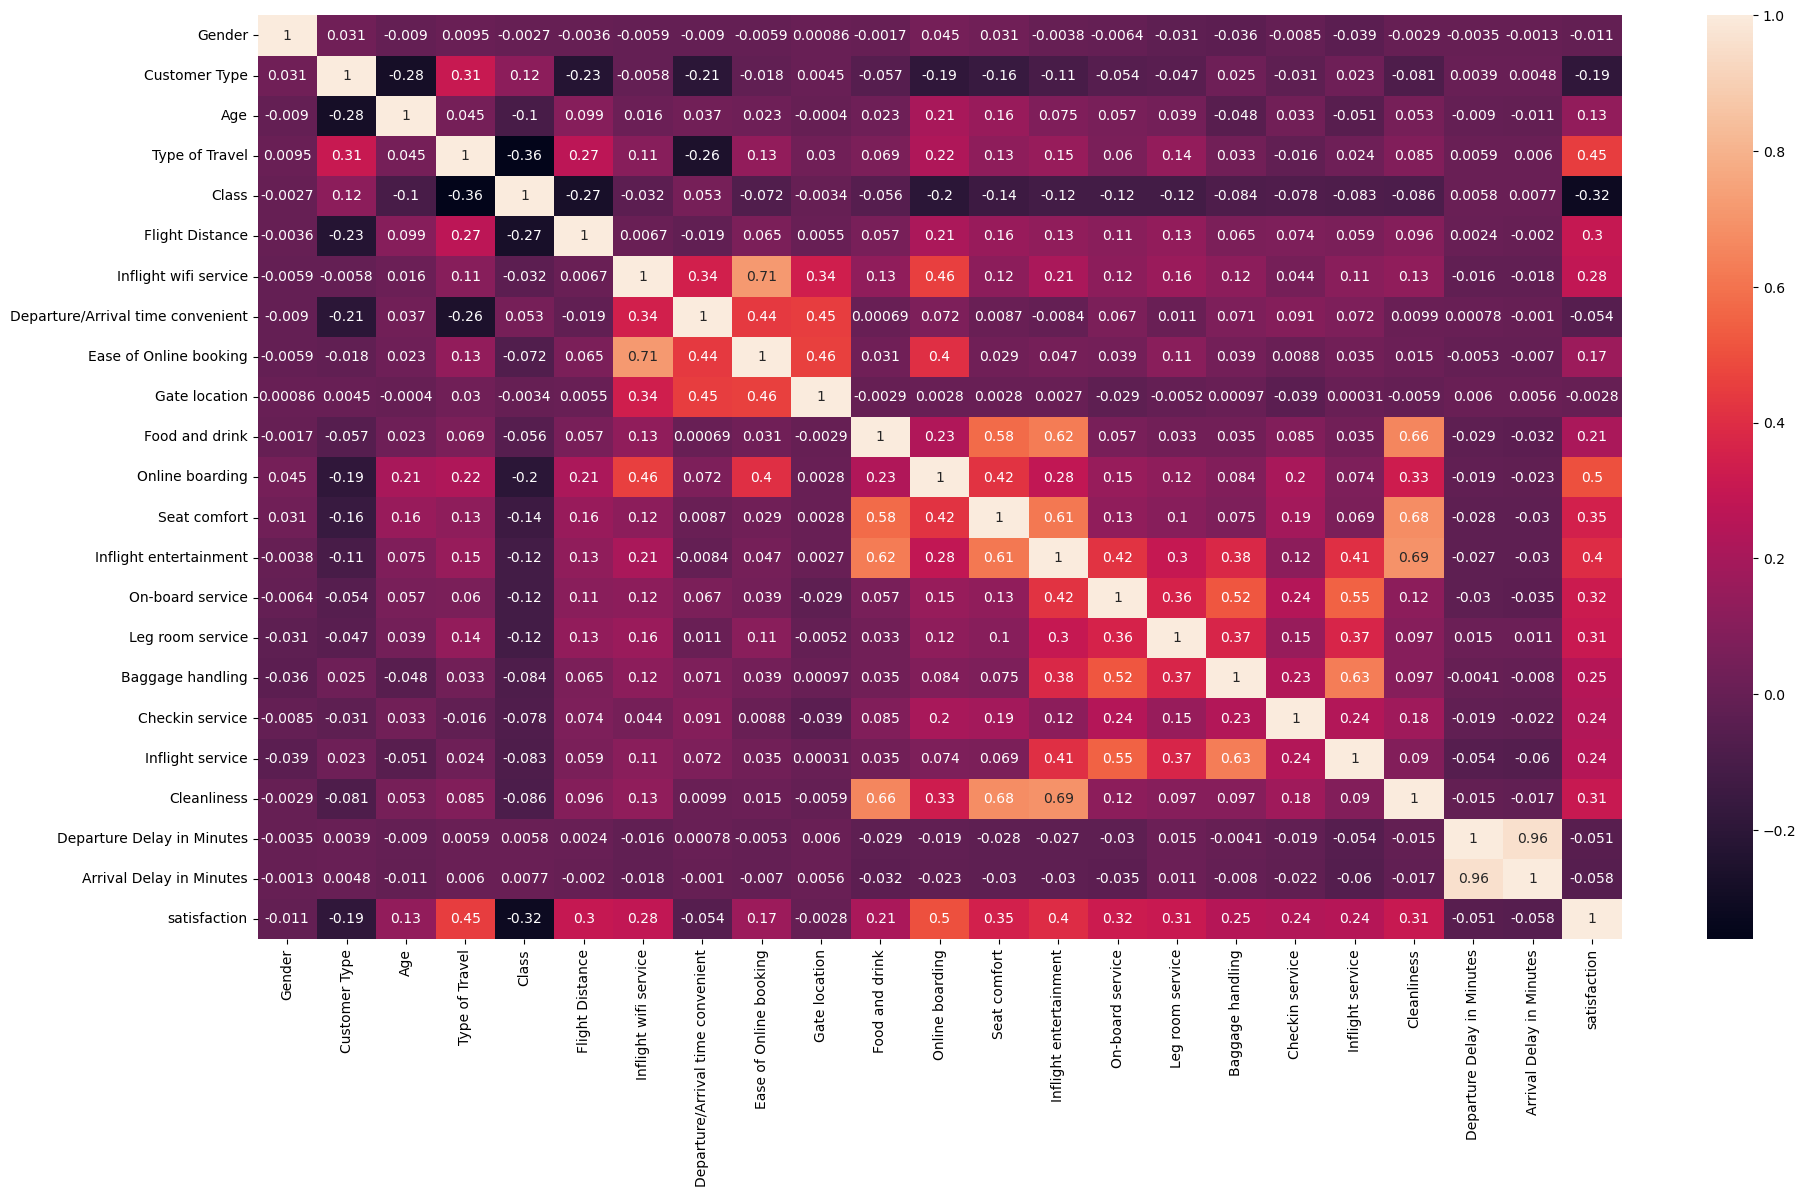

In [17]:
import seaborn as sns
heat_plot = f_df.copy()
heat_plot['satisfaction'] = heat_plot['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1])
heat_plot['Gender'] = heat_plot['Gender'].replace(['Male', 'Female'], [0, 1])
heat_plot['Customer Type'] = heat_plot['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [0, 1])
heat_plot['Type of Travel'] = heat_plot['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1])
heat_plot['Class'] = heat_plot['Class'].replace(['Eco Plus', 'Business', 'Eco'], [0, 1, 2])
plt.figure(figsize=(22,12))
sns.heatmap(heat_plot.corr(), annot=True)

'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are two columns with a very high correlation value of 0.96 (96%). We  can drop any of the two columns. 'Departure Delay in Minutes' column is dropped.

In [18]:
f_df = f_df.drop('Departure Delay in Minutes' , axis=1)

## Step 9: Class Imbalance

From the pieplot in STEP - 2 of visualization, the target variable is imbalanced, hence the 2nd step of our cleaning involves the balancing of the target variable. The resultant class distribution after this step is presented in the step-2 of visualization.

In [19]:
# This consists only of the rows that have the specified value
nod_sat_df = f_df
nod_df = f_df
nod_df = nod_df[nod_df['satisfaction'] == "neutral or dissatisfied"]
nod_df = nod_df.drop(nod_df.index[:18000])
# now from nod_sat_df drop rows consisting of that value
nod_sat_df = nod_sat_df.drop(nod_sat_df[nod_sat_df['satisfaction'] == 'neutral or dissatisfied'].index)
#now concatenate the two dataframes
df = pd.concat([nod_sat_df, nod_df])
print("Final shape of the dataframe after class balancing:",df.shape)

Final shape of the dataframe after class balancing: (90934, 22)


# RUN STEPS 10-12 ONLY AFTER RUNNING ALL THE EDA (SINGLE VARIATE AND MULTIVARIATE STEPS)

## Step 10: Removing outliers

It can be inferred that the columns 'Age', 'Distance', 'Arrival Delay in Minutes' have more number of outliers. So these outliers are to be removed.

In [20]:
f, l = 0.25, 0.75
q1, q3 = df.quantile(f), df.quantile(l)
q3 - q1

Age                                    24.0
Flight Distance                      1374.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            2.0
Inflight entertainment                  3.0
On-board service                        1.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Arrival Delay in Minutes               13.0
dtype: float64

In [21]:
i, j = (df < (q1 - 1.5 * (q3-q1))), (df > (q3 + 1.5 * (q3-q1)))
df = df[~(i|j).any(axis=1)]
df.shape

C:\Users\Sriinitha Reddy\AppData\Local\Temp\ipykernel_13400\3660832867.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  i, j = (df < (q1 - 1.5 * (q3-q1))), (df > (q3 + 1.5 * (q3-q1)))


(62092, 22)

## Step 11: Encoding for Categorical Columns

As we have categorical data (text) in our dataset, before we send the data to the model for training we have to convert the non-numeric data to numeric data. This can be done using label encoding or one-hot encoding. This step of cleaning involves converting non-numerical data to numeric data using encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Gender', 'Customer Type', 'Type of Travel','Class']
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [23]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0.0,satisfied
7,0,0,52,0,0,2035,4,3,4,4,...,5,5,5,5,5,4,5,4,0.0,satisfied
13,1,0,33,1,1,946,4,2,4,3,...,4,4,4,5,2,2,2,4,0.0,satisfied
17,1,0,41,0,0,2075,4,4,2,4,...,4,5,5,5,5,3,5,5,10.0,satisfied
26,0,0,33,0,0,1561,1,1,1,1,...,3,4,4,4,3,5,4,2,0.0,satisfied


In [24]:
print("The shape of the dataframe after encoding the categorical values:",df.shape)

The shape of the dataframe after encoding the categorical values: (62092, 22)


## Step 12: Normalizing Data

Columns 'Age', 'Flight Distance' are yet to be standardized. We have used min_max method to bring these column values in the range between 0 and 1.

In [25]:
def norm_age_flight(colsi):
    mincol, maxcol = df[colsi].min(), df[colsi].max()
    df[colsi] = (df[colsi] - mincol) / (maxcol - mincol)
    return df

In [26]:
cols = ['Age', 'Flight Distance']
for i in cols:
    norm_age_flight(cols)

In [27]:
df[['Age', 'Flight Distance']]

,Age,Flight Distance
4,0.692308,0.047818
7,0.576923,0.523648
13,0.333333,0.239091
17,0.435897,0.534100
26,0.333333,0.399791
...,...,...
25952,0.679487,0.235171
25955,0.743590,0.638620
25960,0.205128,0.108701
25966,0.448718,0.259472


# EDA

## STEP -1 Visualizations

### 1. As we have missing values in our dataset, we have to replace them with either with mean or median of that particular column. In order to choose between the two, we have done a violin plot to understand the data distribution so that if there are many outliers in the column, we replace the missing values with the median else we replace them with the mean.

In [20]:
# plotting violin plots to see which value should we use to replace the missing value.
print(f_df["Arrival Delay in Minutes"].min())
print(f_df["Arrival Delay in Minutes"].max())

0.0
1584.0


<AxesSubplot:ylabel='Arrival Delay in Minutes'>

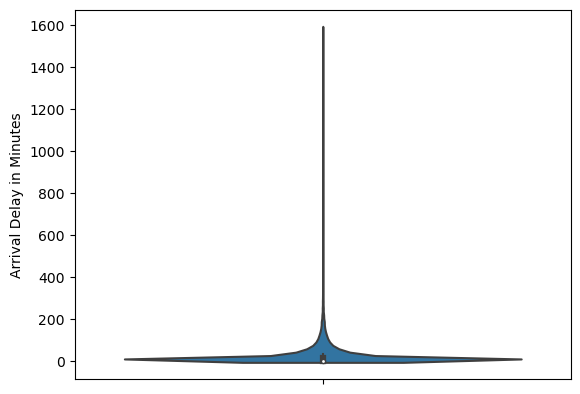

In [21]:
import seaborn as sns
sns.violinplot( y=df["Arrival Delay in Minutes"])

(0.0, 200.0)

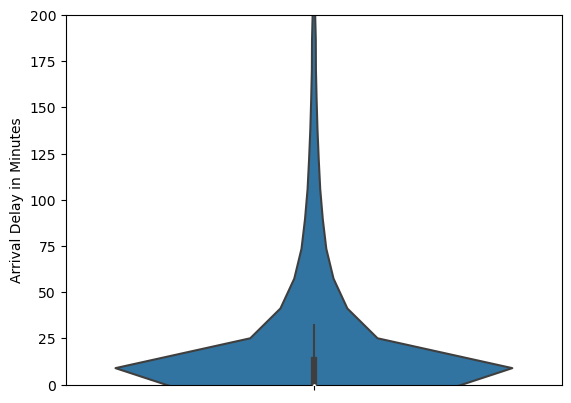

In [22]:
#Just reducing the scale of the y-axis to get a closer view of the data distribution in between the range 0-200
import seaborn as sns
sns.violinplot( y=f_df["Arrival Delay in Minutes"])
plt.ylim(0,200)

### From the above plots, we can conclude that it would be suitable to replace the missing values in the "Arrival Delay in Minutes" column with the median of the column.

## STEP - 2 Visualizations

### Checking if our data is imbalanced by plotting a piechart to understand the target value (satisfaction) distribution.

In [23]:
#airairlines_df["Arrival Delay in Minutes"].unique().count()
f_df["Arrival Delay in Minutes"].nunique(dropna = True)

472

<AxesSubplot:ylabel='satisfaction'>

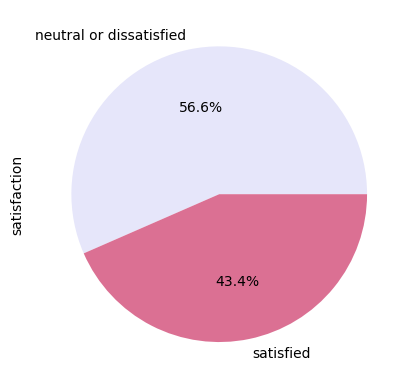

In [24]:
#can put distribution before and after distribution
y = f_df["satisfaction"].value_counts()
labels = ["Satisfied","Neutral or dissatisfied"]
colors = ("lavender","palevioletred")
y.plot(kind = "pie",autopct = '%1.1f%%',colors = colors)  

### From the above pie chart, it can be concluded that the data is little imbalanced (5%-6%). Improving that can result in better training accuracy of the model. Hence, the data cleaning and pre-processing step to balance the class distribution has been performed on our dataset. 

## STEP - 3 VISUALIZATIONS

### Pie chart describing the  distribution of target variable after class balancing

<AxesSubplot:ylabel='satisfaction'>

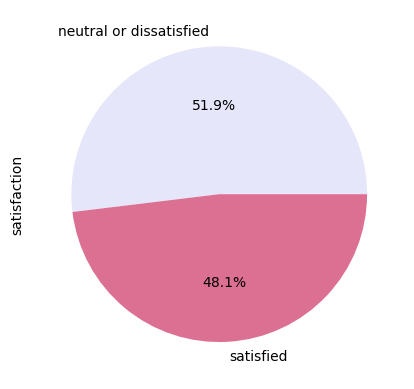

In [25]:
y = df["satisfaction"].value_counts()
labels = ["Satisfied","Neutral or dissatisfied"]
colors = ("lavender","palevioletred")
y.plot(kind = "pie",autopct = '%1.1f%%',colors = colors)  

## STEP - 4 VISUALIZATIONS

### Before we normalize and scale the data, it is essential to identify the outliers in the data. We plot boxplots on each of the feature to identiy the outliers and elimnate them.

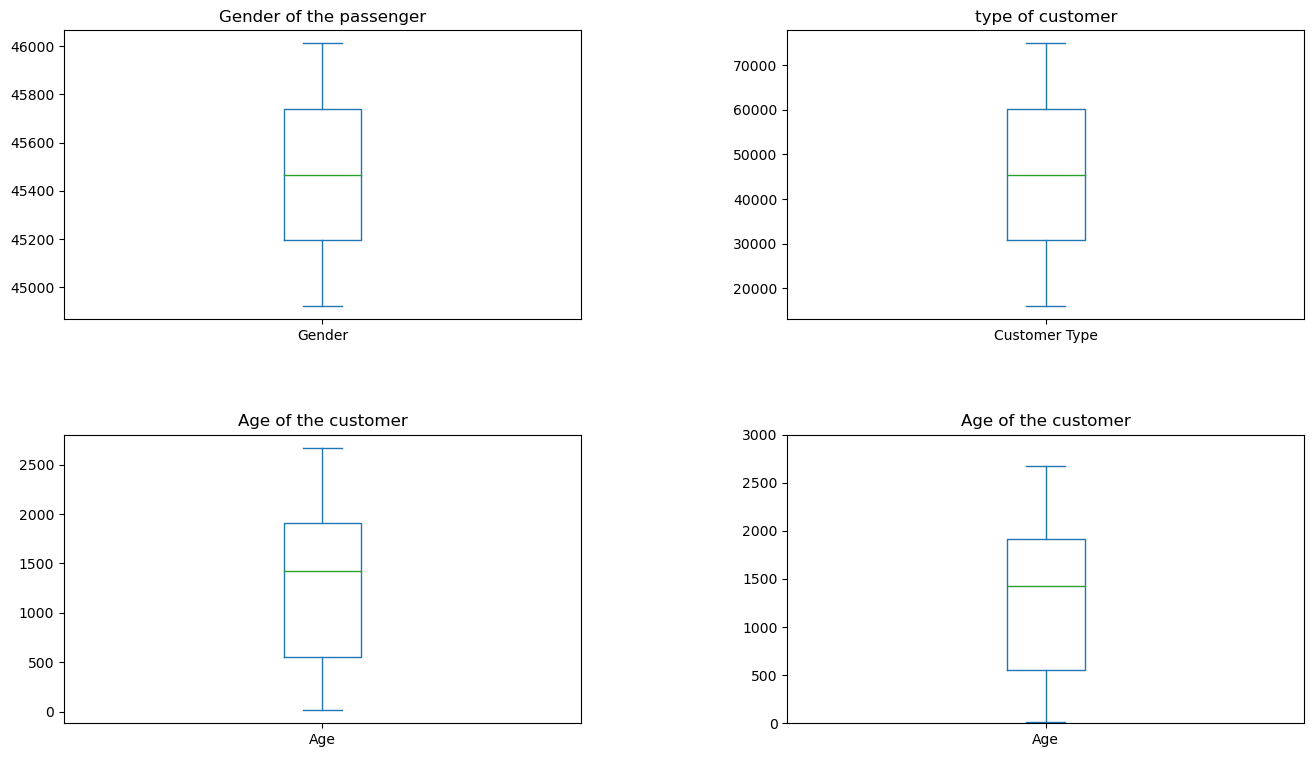

In [26]:
plt.subplot(221)

df['Gender'].value_counts().plot(kind='box', title='Gender of the passenger',figsize=(16,9))
plt.subplot(222)
df['Customer Type'].value_counts().plot(kind='box', title='type of customer')
plt.subplot(223)

df['Age'].value_counts().plot(kind='box', title='Age of the customer')
plt.subplot(224)

df['Age'].value_counts().plot(kind='box', title='Age of the customer')
plt.ylim(0,3000)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.show()

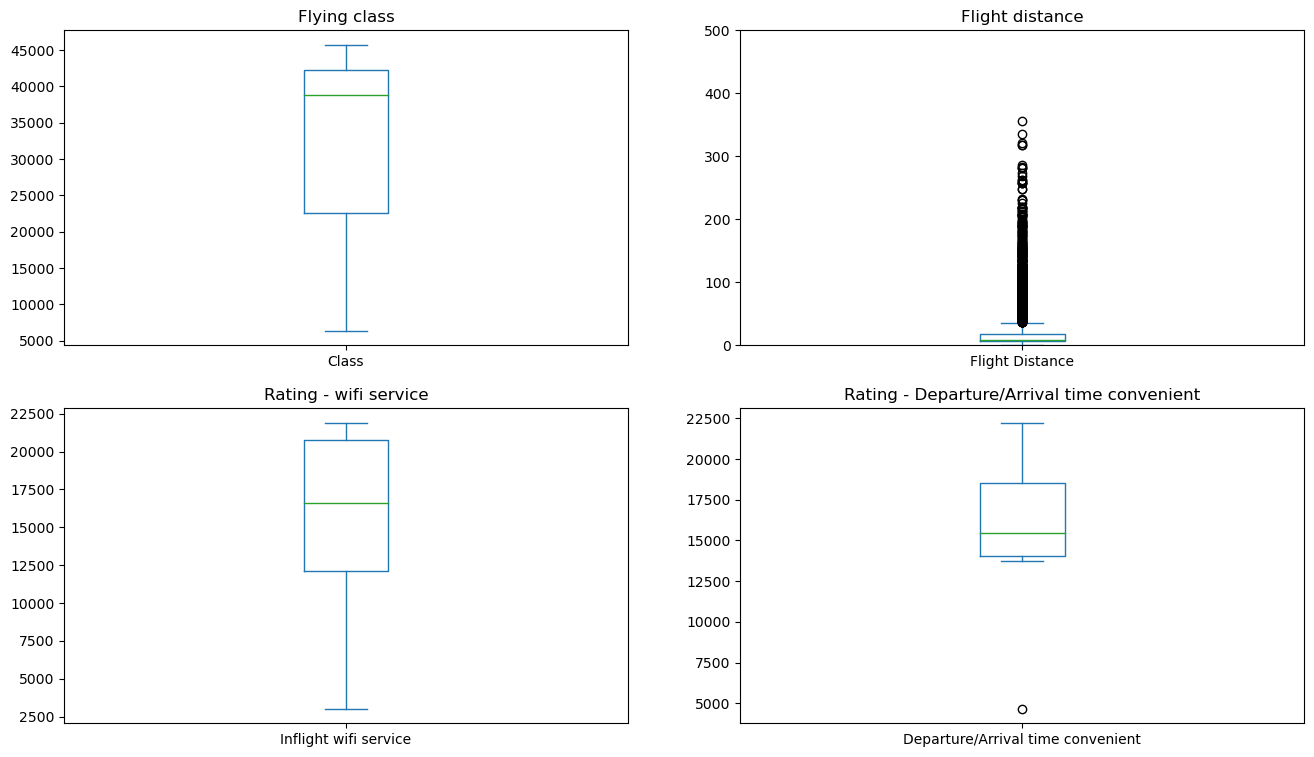

In [27]:
plt.subplot(221)

df['Class'].value_counts().plot(kind='box', title='Flying class', figsize=(16,9))
plt.subplot(222)

df['Flight Distance'].value_counts().plot(kind='box', title='Flight distance')
plt.ylim(0,500)
plt.subplot(223)

df['Inflight wifi service'].value_counts().plot(kind='box', title='Rating - wifi service')
plt.subplot(224)

df['Departure/Arrival time convenient'].value_counts().plot(kind='box', title='Rating - Departure/Arrival time convenient')
plt.show()

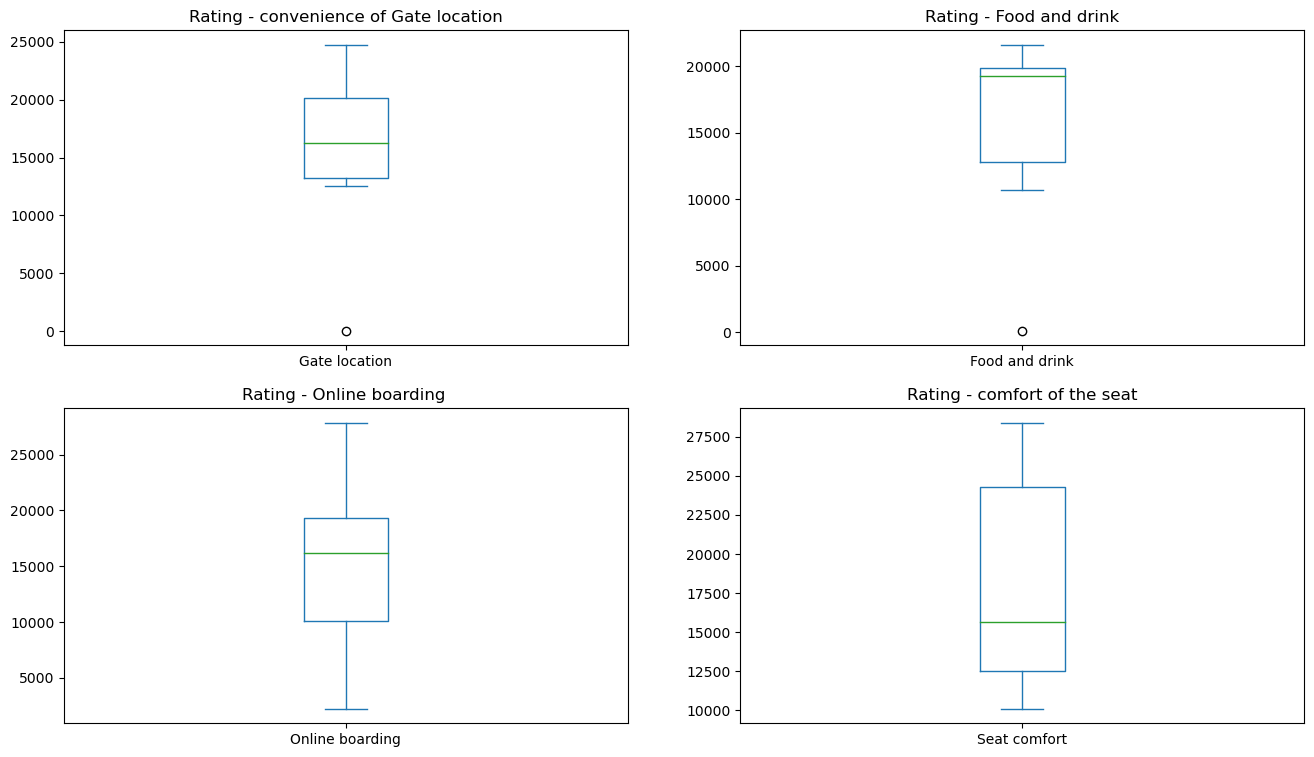

In [28]:
plt.subplot(221)

df['Gate location'].value_counts().plot(kind='box', title='Rating - convenience of Gate location', figsize=(16,9))
plt.subplot(222)

df['Food and drink'].value_counts().plot(kind='box', title='Rating - Food and drink')
plt.subplot(223)

df['Online boarding'].value_counts().plot(kind='box', title='Rating - Online boarding ')
plt.subplot(224)

df['Seat comfort'].value_counts().plot(kind='box', title='Rating - comfort of the seat')
plt.show()

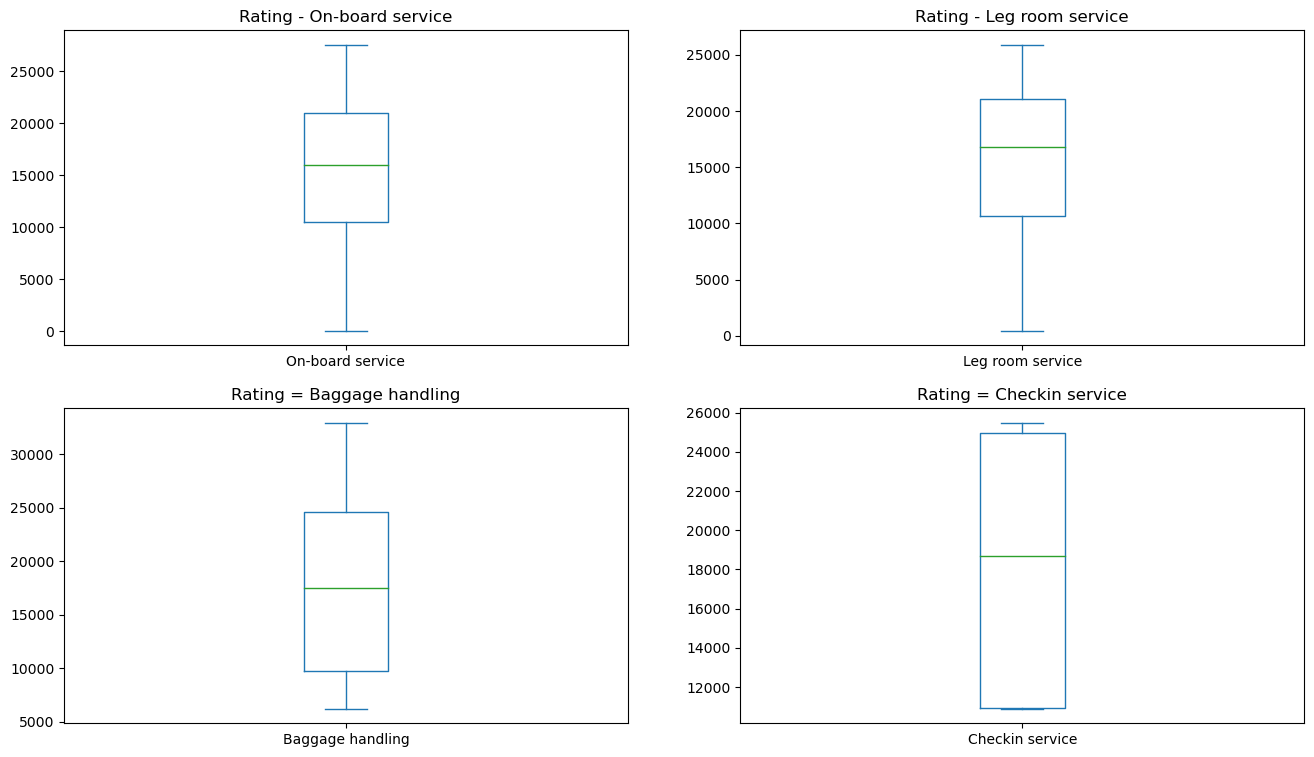

In [29]:
plt.subplot(221)

df['On-board service'].value_counts().plot(kind='box', title='Rating - On-board service', figsize=(16,9))
plt.subplot(222)

df['Leg room service'].value_counts().plot(kind='box', title='Rating - Leg room service')
plt.subplot(223)

df['Baggage handling'].value_counts().plot(kind='box', title='Rating = Baggage handling')
plt.subplot(224)

df['Checkin service'].value_counts().plot(kind='box', title='Rating = Checkin service')

plt.show()

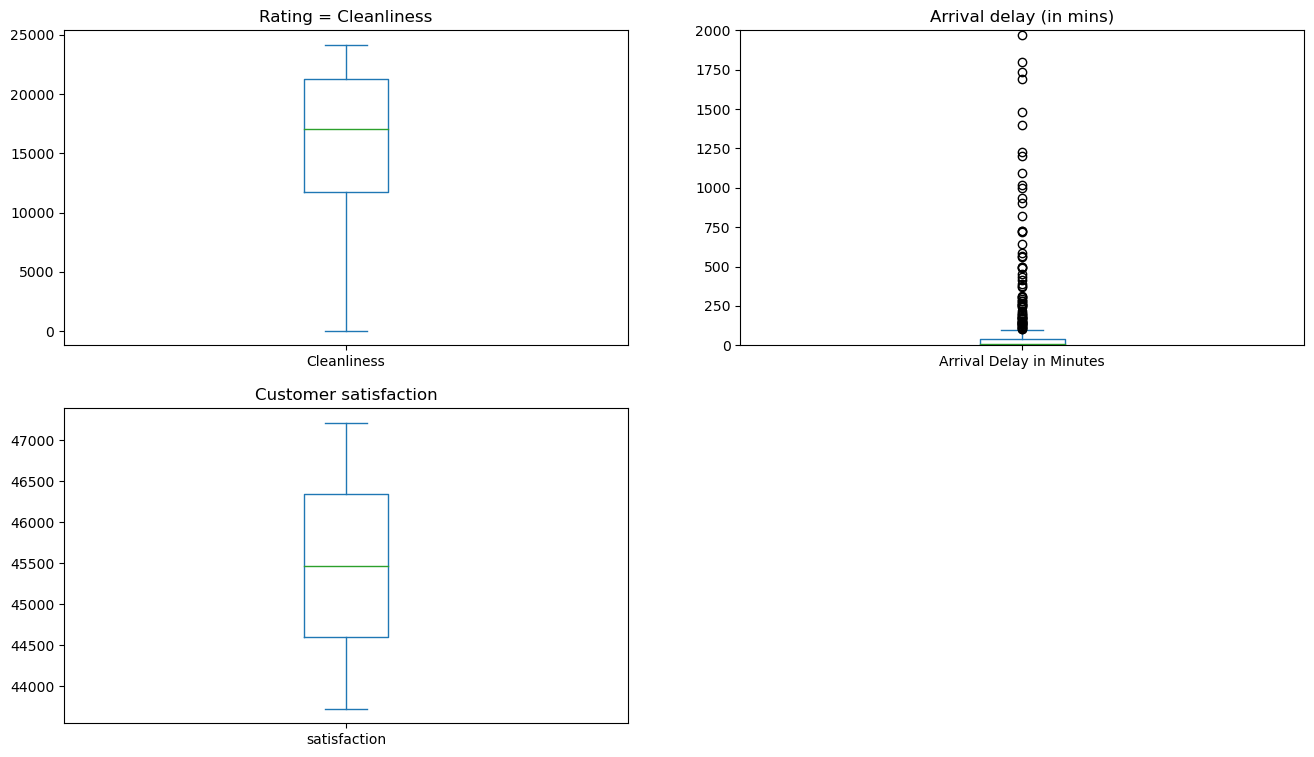

In [30]:
plt.subplot(221)

df['Cleanliness'].value_counts().plot(kind='box', title='Rating = Cleanliness', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df['Arrival Delay in Minutes'].value_counts().plot(kind='box', title='Arrival delay (in mins)')
plt.ylim(0,2000)

plt.xticks(rotation=0)

#plt.subplot(223)

#df['Arrival Delay in Minutes'].value_counts().plot(kind='box', title='Arrival delay (in mins)')
#plt.ylim(0,2000)
#plt.xticks(rotation=0)

plt.subplot(223)

df['satisfaction'].value_counts().plot(kind='box', title='Customer satisfaction')

plt.xticks(rotation=0)


plt.show()

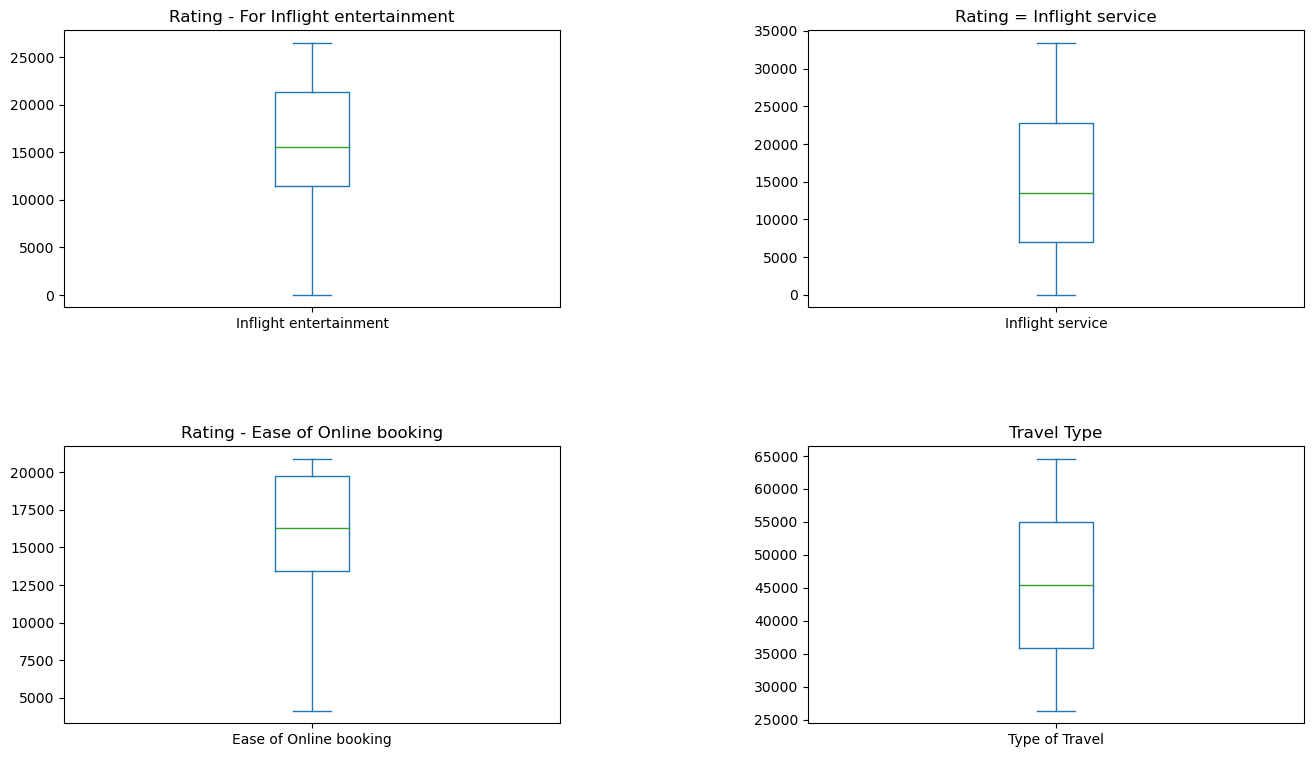

In [31]:
plt.subplot(221)

df['Inflight entertainment'].value_counts().plot(kind='box', title='Rating - For Inflight entertainment',figsize=(16,9))
plt.subplot(222)

df['Inflight service'].value_counts().plot(kind='box', title='Rating = Inflight service')
plt.subplot(223)

df['Ease of Online booking'].value_counts().plot(kind='box', title='Rating - Ease of Online booking')
plt.subplot(224)

df['Type of Travel'].value_counts().plot(kind='box', title='Travel Type')

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)
plt.show()

## STEP - 5 VISUALIZATIONS

### Plotting box plots after removing outliers

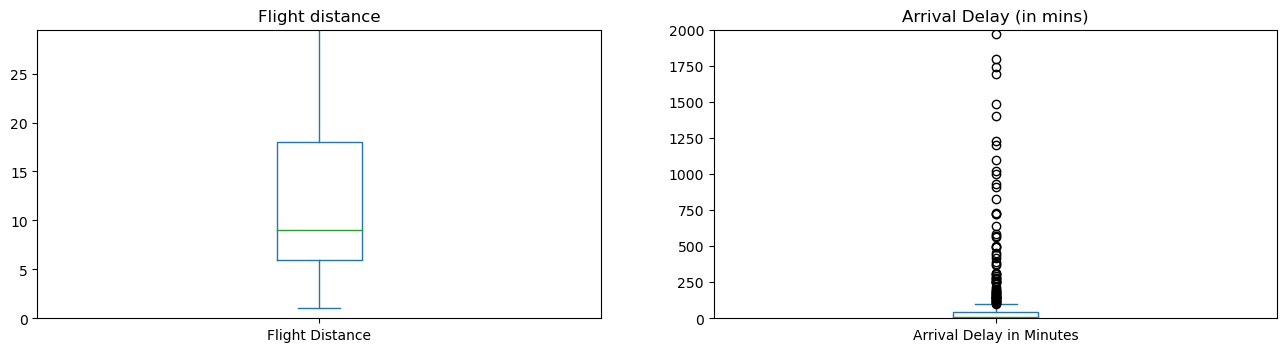

In [32]:
plt.subplot(221)

df['Flight Distance'].value_counts().plot(kind='box', title='Flight distance',figsize=(16,9))
plt.ylim(0,29.5)
plt.subplot(222)

df['Arrival Delay in Minutes'].value_counts().plot(kind='box', title='Arrival Delay (in mins)')
plt.ylim(0,2000)
#plt.subplot(223)
#df['Arrival Delay in Minutes'].value_counts().plot(kind='box', title='Arrival delay (in mins)')
#plt.ylim(0,2000)
#plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

## STEP - 6 VISUALIZATIONS

## Univariate Analysis of the data

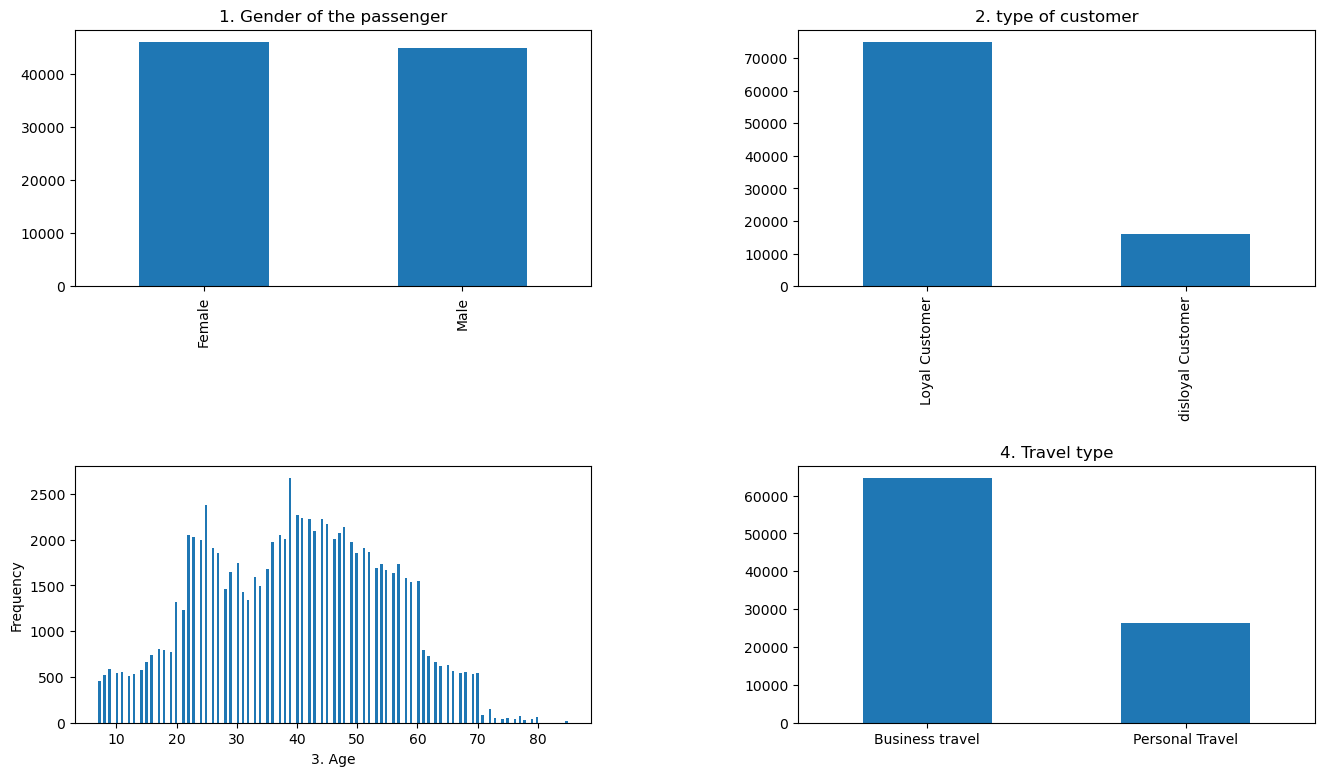

In [33]:
plt.subplot(221)

df['Gender'].value_counts().plot(kind='bar', title='1. Gender of the passenger', figsize=(16,9))
plt.subplot(222)

df['Customer Type'].value_counts().plot(kind='bar', title='2. type of customer')

plt.subplot(223)
#group age of customers too
#df['Age'].value_counts().plot(kind='bar', title='Age of the customer')
#df.groupby('Gender').Age.hist()
#For the feature "age" we have plotted an histogram as the data is scattered
plt.hist(df['Age'], bins=190)
plt.xlabel("3. Age")
plt.ylabel("Frequency")
plt.subplot(224)

df['Type of Travel'].value_counts().plot(kind='bar', title='4. Travel type')

plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.7)
plt.show()

## Detailed Univariate analysis of data

### In univariate analysis we try to understand the behaviour of each variable separately and derive conclusions about the same. 
### In our airline passenger satisfaction dataset various EDA and cleaning steps have been performed simultaneously and now we try to analyse the features one at a time. For our dataset, bar plots are the most suitable ones to give an insight about each feature. As some of our columns have values that are more scattered in nature, we choose to plot histogram for the same for a better understanding.
### Here is our analysis from the univariate analysis of our dataset:
### 1. Gender: In the gender feature of our dataset it can be inferred that the number of female customers are slightly higher than the number of  male customers. In our bivariate analysis we can discover some interesting facts by plotting this feature against the target variable.
### 2. Type of Customers: From this plot it can inferred that the number of loyal customers are significantly higher than the number of disloyal customers and this shows that most of the customers liked the airline's services and travelled with them again.
### 3. Age: In our dataset, the values in the age category are scattered and it also kind of makes sense as the travellers will be of different age groups. Bar plot would not be an ideal plot for this kind of data hence we plotted a histogram to make some conclusions. From the histogram plot, we concluded that highest number of the airline travellers are aged around 38-40 years.
### 4. Travel type: From this bar plot if can be inferred that most of the travellers travel for business purposes. This helps the airlines to come up with more business strategies designed for business travellers as majority of their traveller are from this sector.

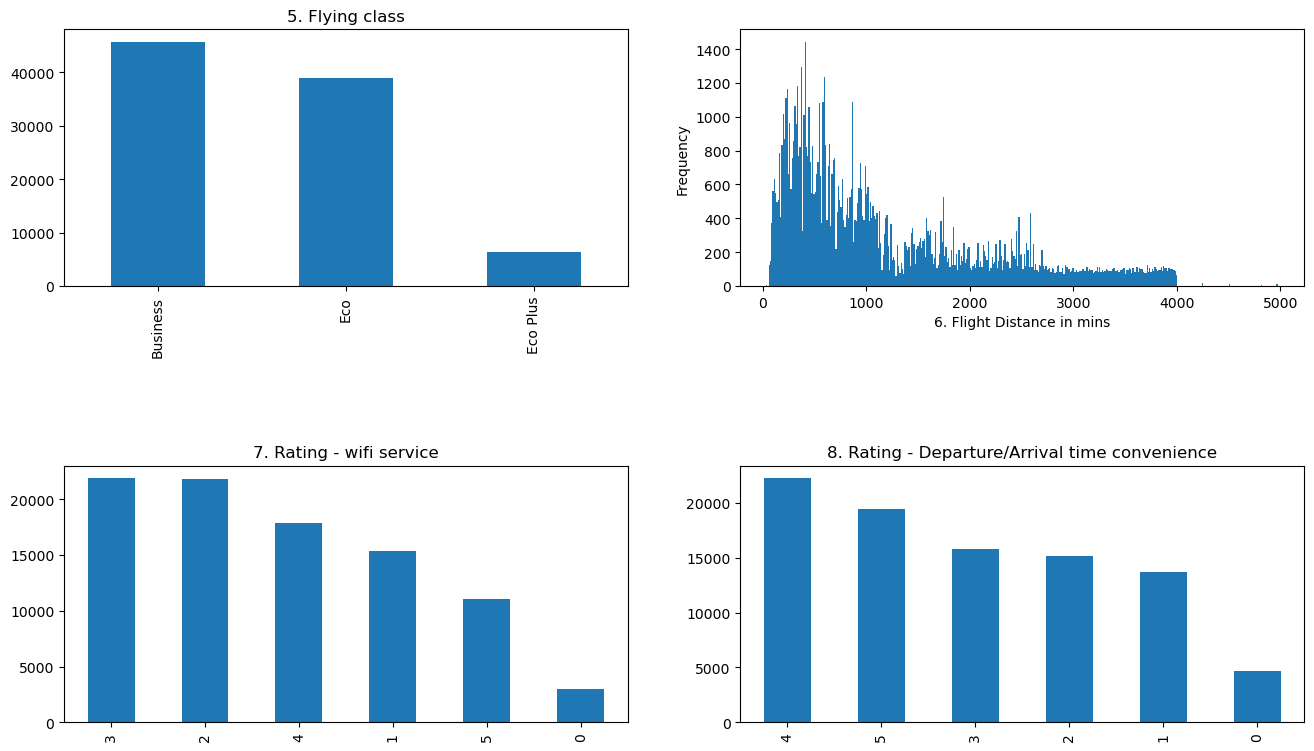

In [34]:
plt.subplot(221)

df['Class'].value_counts().plot(kind='bar', title='5. Flying class', figsize=(16,9))
plt.subplot(222)

#group the flight distance
#df['Flight Distance'].value_counts().plot(kind='bar', title='Flight distance')
plt.hist(df['Flight Distance'], bins=400)
plt.xlabel("6. Flight Distance in mins")
plt.ylabel("Frequency")
plt.subplot(223)

df['Inflight wifi service'].value_counts().plot(kind='bar', title='7. Rating - wifi service')
plt.subplot(224)

df['Departure/Arrival time convenient'].value_counts().plot(kind='bar', title='8. Rating - Departure/Arrival time convenience')
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.7)
plt.show()

### 5. Flying class: This bar plots gives the number of customers travelling in various flying classes like business, eco and eco plus. A conclusion that can we made from this is very few people are preferring to go for eco plus this might be because there might be no much difference in terms of the services offered in eco plus in comparision to eco and the cost might be considerably higher than Eco. For a traveller in such a case, it might not be feasible to consider "eco plus" over "eco".
### 6. Flight Distance: For this feature, we have plotted a histogram as the values are scattered. It can be inferred that most of the flights have fliying time around 0-1000 mins. Later in the bivariate analysis we can plot this variable against various other features to understand if it's dependent on other features.
### 7. Wifi Service: This plot is an essential plot as most of us expect a proper wifi connection during our travel time. From the bar plot for this feature, it can be inferred that most of them rated the wifi services a 3/5 which indicates the airplanes for an improvement in the same.
### 8. Departure/Arrival time convenience: This plots helps the airlines in understanding the flight timings they schedule and chance the time according to the convenience of the customers depending on the rating. 

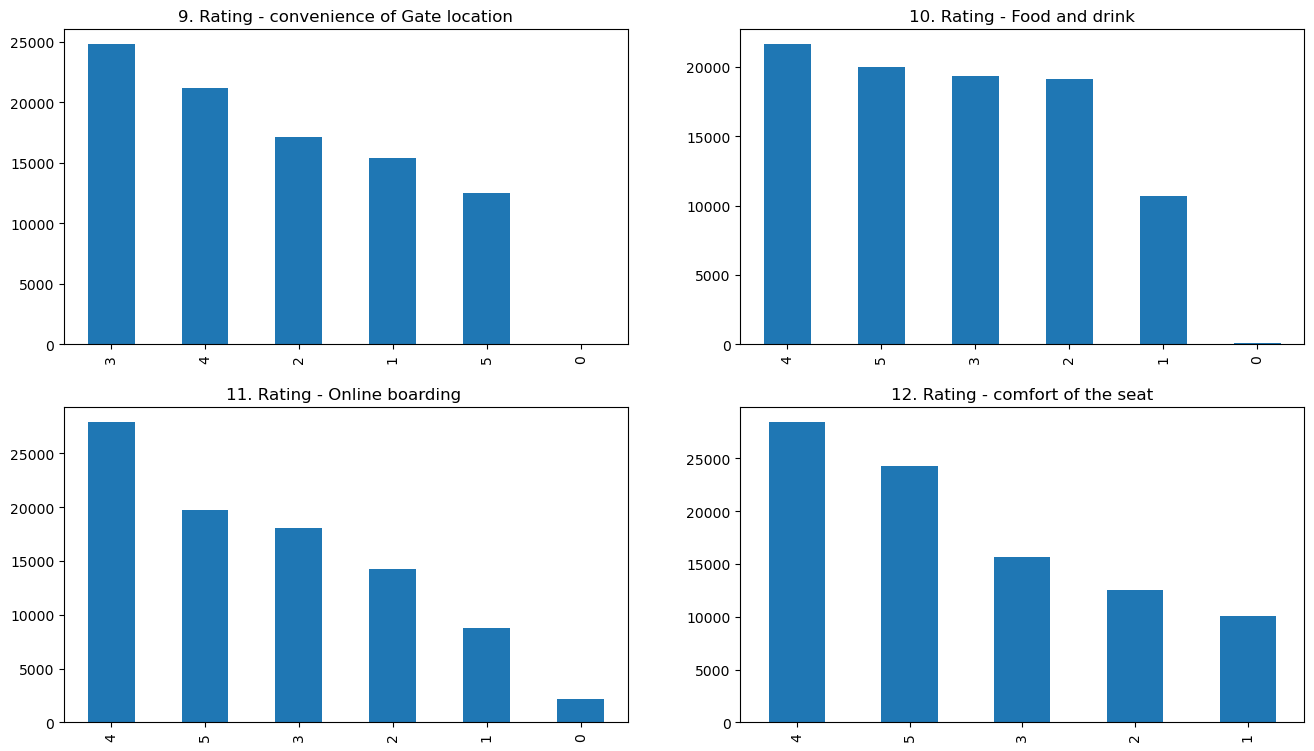

In [35]:
plt.subplot(221)

df['Gate location'].value_counts().plot(kind='bar', title='9. Rating - convenience of Gate location', figsize=(16,9))
plt.subplot(222)

df['Food and drink'].value_counts().plot(kind='bar', title='10. Rating - Food and drink')
plt.subplot(223)

df['Online boarding'].value_counts().plot(kind='bar', title='11. Rating - Online boarding ')
plt.subplot(224)

df['Seat comfort'].value_counts().plot(kind='bar', title='12. Rating - comfort of the seat')
plt.show()

### 9. Convenience of Gate: How convenient is it for the customer get to the boarding gate is also important as it's tiresome to find the gate in big airports. Depending on the customer ratings, the airlines can make some changes in the same to increase the number of customers. As most of them rated a 3/5, it means for most of the travellers it's not very convenient to keep searching for the gate. 
### 10. Food and drinks: From the plot the rating is almost similar as the number of customers who gave the rating of 4,5,3,2 are almost equal. This indicates that a significant number of customers are extremely satisfied while a significant amount of them are dissatified too. This gives the airlines to a chance to improve their food and drink services.
### 11. Online Boarding: It is very conveniet for a traveller to complete the boarding if there's no checkin luggage to avoid the long queues at the airport. As most of them rated the online boarding a 4/5, it is understadable that most of the customers use online boarding and they are satisfied with the service delivered by the airlines too.
### 12. Comfort of the seat: This can be an essential feature as travellers who are flying long distances would prefer comfortable seats. We can furthur plot some bivariate plots to see the comfort of seats, flying class, and flying distance have any relationship.

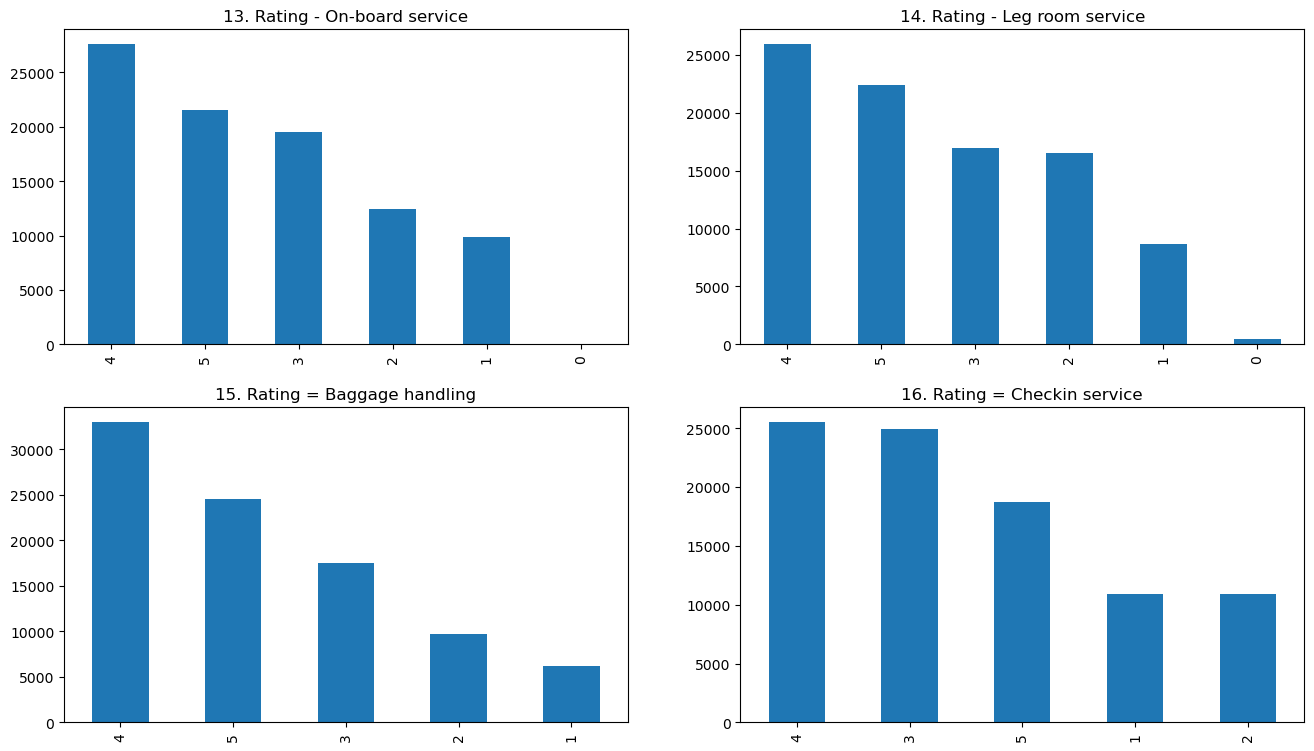

In [36]:
plt.subplot(221)

df['On-board service'].value_counts().plot(kind='bar', title='13. Rating - On-board service', figsize=(16,9))
plt.subplot(222)

df['Leg room service'].value_counts().plot(kind='bar', title='14. Rating - Leg room service')
plt.subplot(223)

df['Baggage handling'].value_counts().plot(kind='bar', title='15. Rating = Baggage handling')
plt.subplot(224)

df['Checkin service'].value_counts().plot(kind='bar', title='16. Rating = Checkin service')
plt.show()


### 13. On- board Service: knowing how efficient is the on-boarding service offered by the airlines helps them to improve and train their crew so as to get maximum customer satisfaction. From the bar graph, it can be inferred that most of the travellers are very much satisfied with the services offered as most of them offered 4/5 and 5/5.
### 14. Leg room service: Most of the customers are satisfied with the leg room offered by the airline. This can be a useful a indicator for improving the design of the airplane.
### 15. Baggage Handling: From the bar plot, it can be inferred that maximum number of customers are satisfied with the baggae handling service offered by the airline.
### 16. Checkin service: This is an essential indicator. If the checkin service offered by the airlines is not smooth and easy the airlines might lose customers. From the bar plot, maximum customers offered a rating of 4/5 and 3/5 which indicates that there are things the airlines can work on to improve the service.

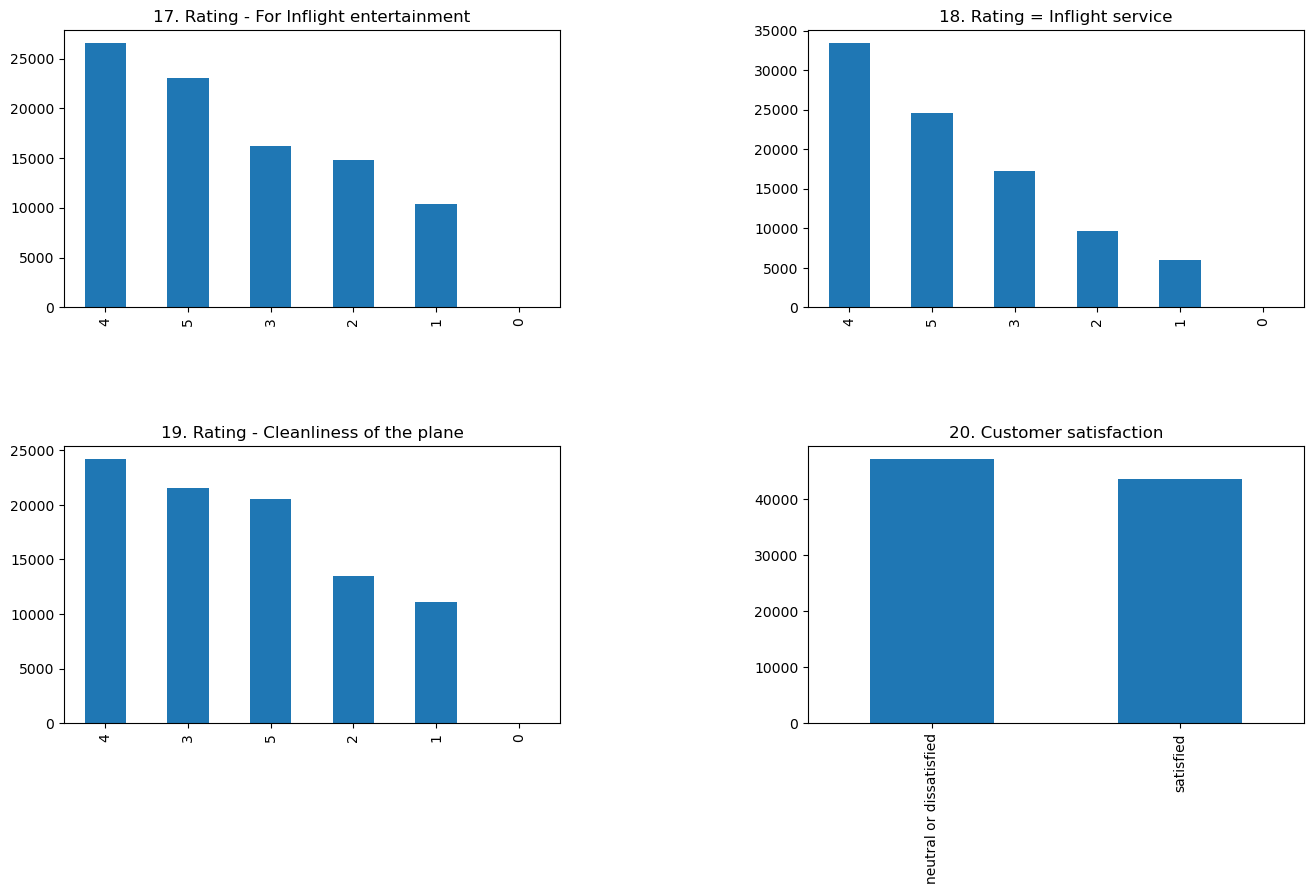

In [37]:
plt.subplot(221)

df['Inflight entertainment'].value_counts().plot(kind='bar', title='17. Rating - For Inflight entertainment',figsize=(16,9))
plt.subplot(222)

df['Inflight service'].value_counts().plot(kind='bar', title='18. Rating = Inflight service')
plt.subplot(223)

df['Cleanliness'].value_counts().plot(kind='bar', title='19. Rating - Cleanliness of the plane')
plt.subplot(224)
df['satisfaction'].value_counts().plot(kind='bar', title='20. Customer satisfaction')

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

plt.show()
#should add spacing here

### 17. Inflight entertainment: In - flight entertainment includes various aspects like availability of movies, music albums etc. This is necessary to keep the traveller engaged throughout the journey. 
### 18. Inflight services: From the bar graph, it is observed that majority of the customers gave a decent rating in terms of the inflight services offered by the airlines. Though there are considerable amount of customers who gave an average rating of 3/5, the number of customers who gave 4/5 and 5/5 are significantly higher.
### 19. Cleanliness of the plane: Even in this feature, most of the customers rated the service as "above average (4/5). But there are also considerable number of customers who gave a bad rating (1/5). The airlines must improve in this aspect to reduce the number of customers unhappy with the cleanliness of the plane.
### 20. Customer Satisfaction: This is the target feature in our dataset, we furthur plot bivariate plots of other features against this feature to understand the relation between this features and the other independent features.

### 21. Departure delay in minutes: From the above histogram plot, it is conclusive that most of the flights are departing with very less delay. This can be an important factor for the airlines to retain their customers.

Text(0, 0.5, 'Frequency')

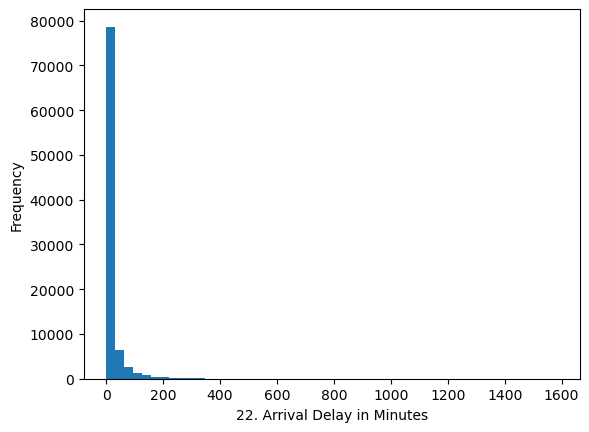

In [38]:
plt.hist(df['Arrival Delay in Minutes'], bins=50)
plt.xlabel("22. Arrival Delay in Minutes")
plt.ylabel("Frequency")

### 22. Arrival delay in minutes: A similar inference can be made from this plot as well, as it is observed that most of the flights are arriving on time as this is essential for customer retainance. 

## VISUALIZATIONS 

### Multivariate analysis of data

### Since, out dataset consists of categorical values, the best way to understand the relation between each other is by plotting "categorical plots". We achieve this using the "seaborn" library of python.

C:\Users\Shravani Soma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


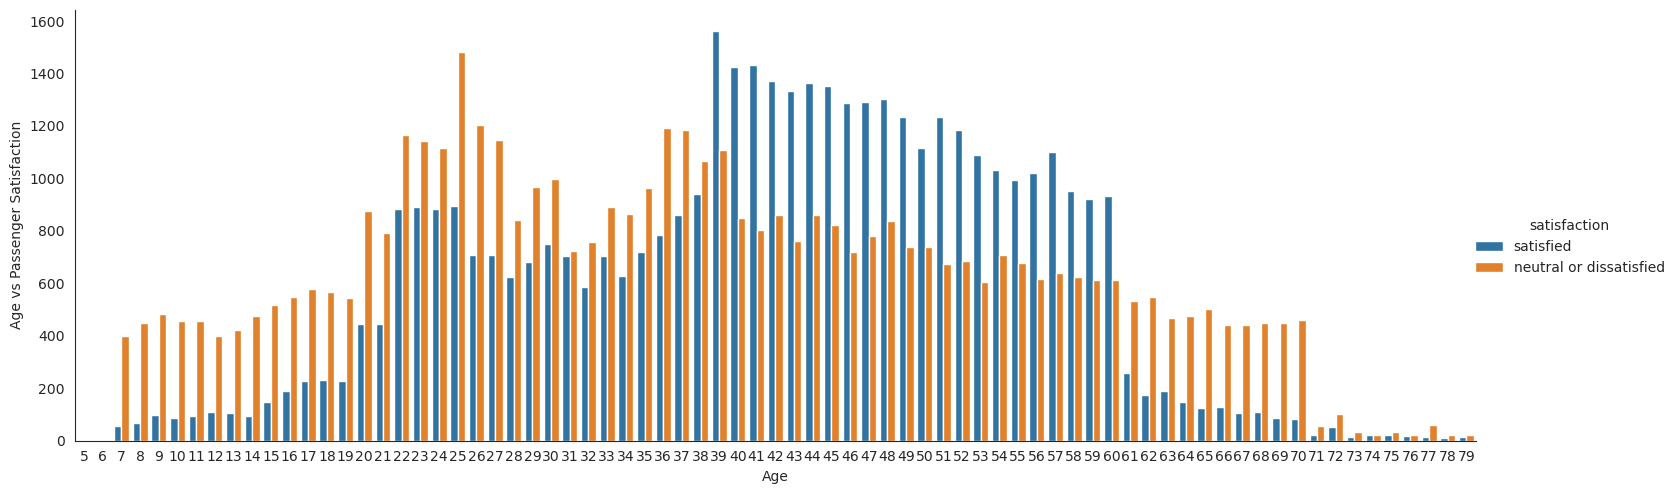

In [40]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

## Analysis:
### As part of the EDA, we have plotted a multivariate plot to understand the relationship between "Age" and "Passenger Satisfaction". From the above count chart we can conclude that the highest number of satisfied customers belong to the age group of 39 - 60. The highest number of "neutral or dissatified" customers are between the age group of 25-27. It can also be inferred that the highest number of customers using the airlines are also spanned between the ages 38 - 60.

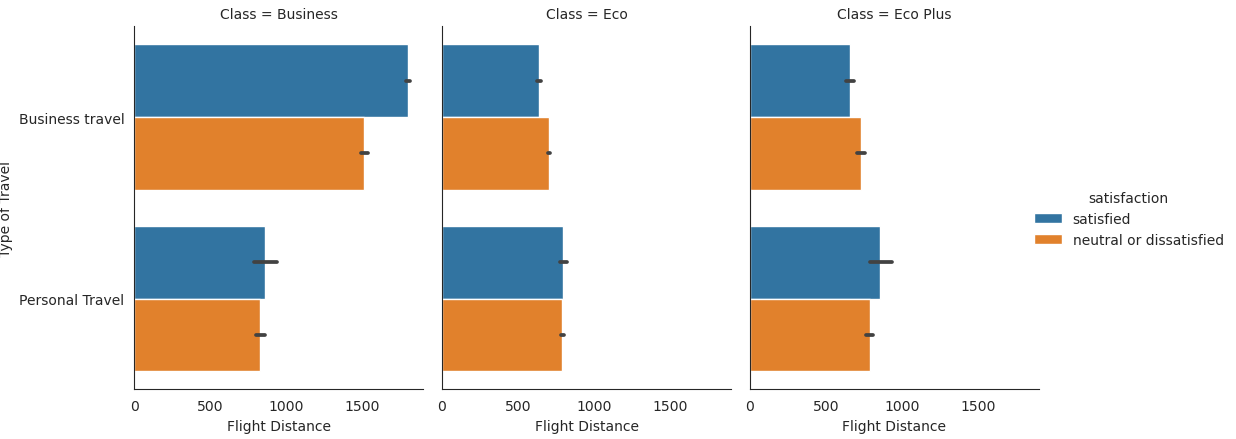

In [41]:
#plot count plot for the same
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

## Analysis:
### From the above catplot, we can infer the following things:
### 1. It can be inferred that people who travel long distances usually prefer travelling in "business class" as compared to "Eco" and "Eco Plus".
### 2. Customers travelling for "Personal" reasons are almost equal in all the three classes i.e Business, Eco and Eco Plus. 
### 3. Customers travelling for "Business" reasons would preferebly travel in business class as compared to the other classes.

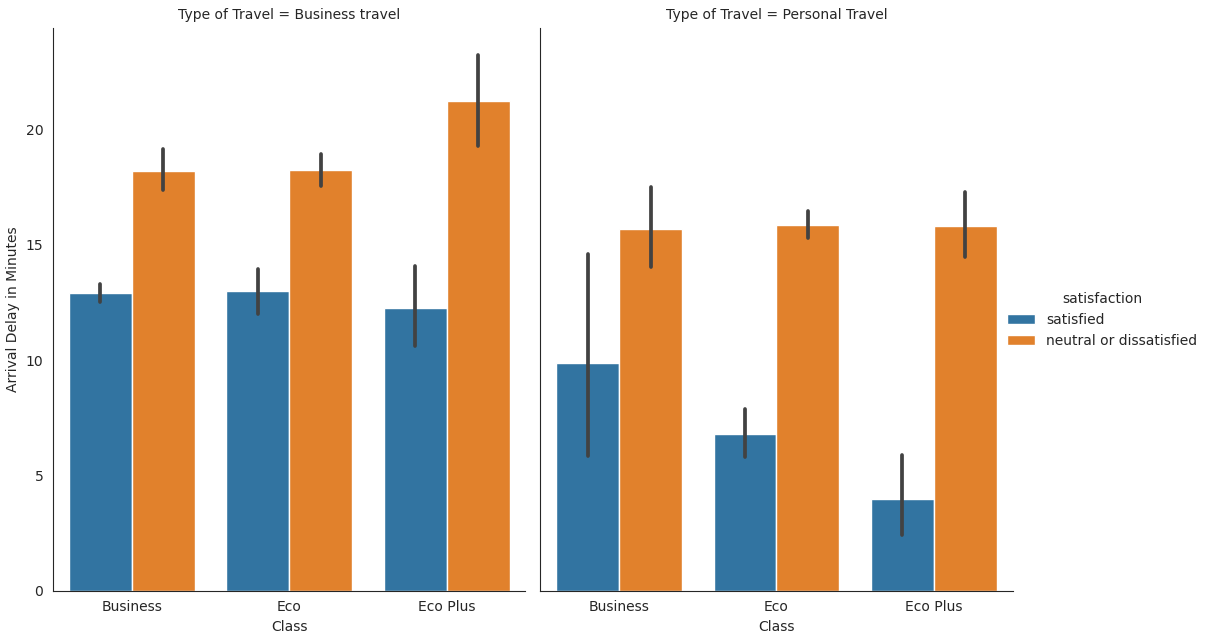

In [43]:
#do count plot for the same
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=6.5, aspect=.8)

## Analysis:
### From the above catplot, the following inferences can be made:
### 1. In both "Business Travel" and "Personal Travel", the arrival delay is effecting the satisfaction of the customers belonging the the classes "Eco" and "Eco Plus" as compared to that of "Business class" in both travel types.
### 2. Customers travelling for "Business" purposes and travelling in "Eco Plus" class are the most "neutral or dissatisfied" customers out of all the above categories.

C:\Users\Shravani Soma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


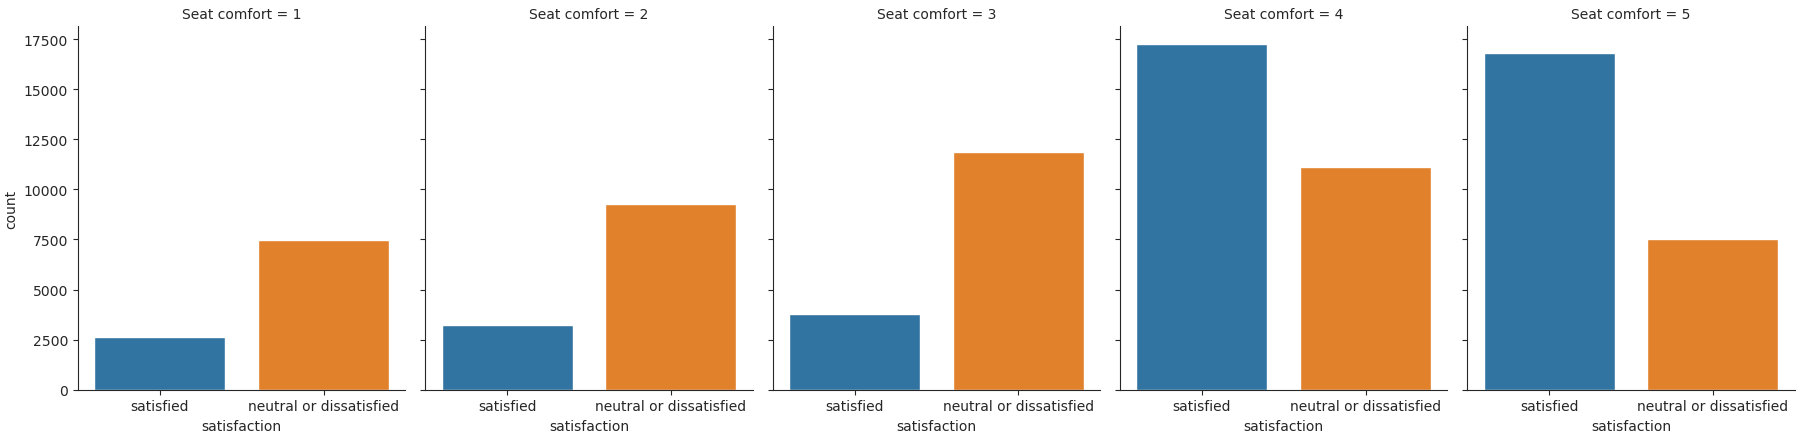

In [44]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=df, kind="count", height=4.5, aspect=.8)

## Analysis:
### From the above catplot, the following inferences can be made:
### 1. As we see that the customers who gave decent (4/5) and great (5/5) rating for the "Comfort of the seat" are more likely to be "satisfied" with the overall flying experience.
### 2. Customers who gave an average or below average rating for the "Comfort of the seat" are more likely to be "neutral of dissatified" with the overall flying experience.

C:\Users\Shravani Soma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


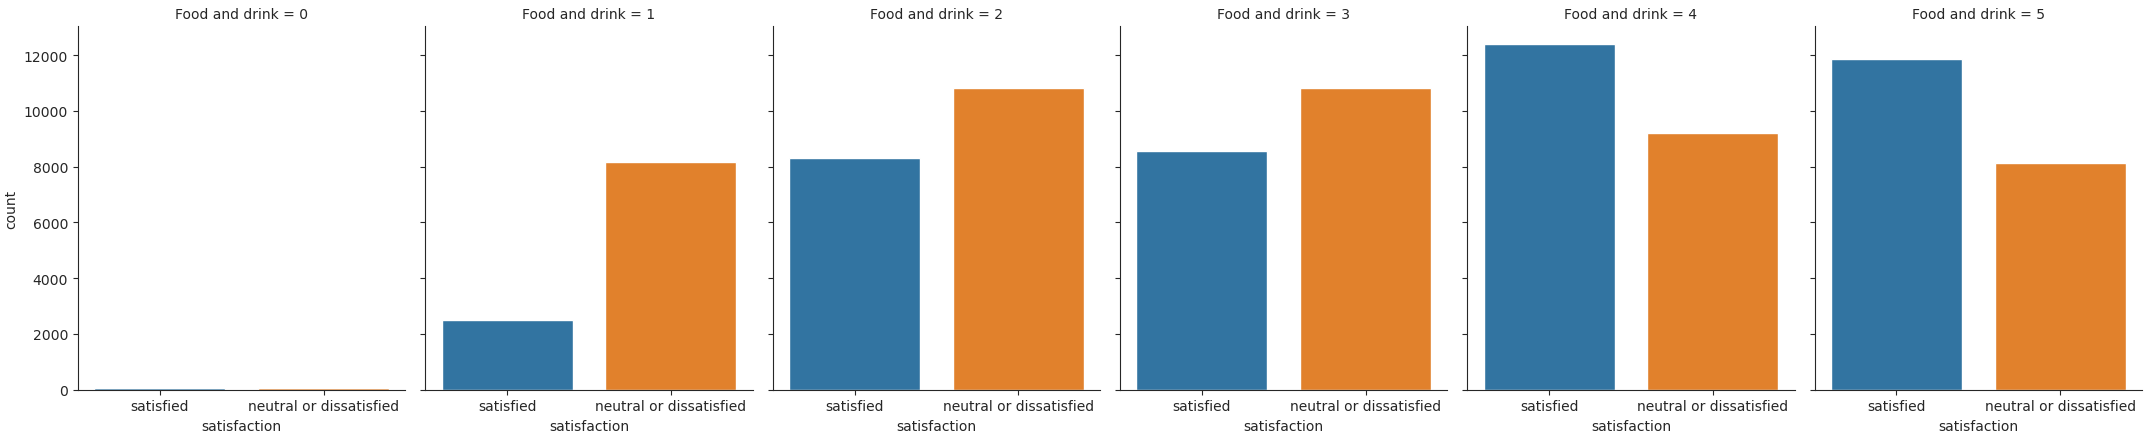

In [45]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=df, kind="count", height=4.5, aspect=.8)

## Analysis:
### From the above catplot, we can observe the following things:
### 1. There are abosolutely zero number of customers to rated the "Food and drinks" service of the airlines a 0/5.
### 2. Customers who gave decent (4/5) and great (5/5) rating for the "Food and Drink" service are more likely to be "satisfied" with the overall flying experience are they are considerably large in number as compared with the "neutral or dissatified" customers who gave the same rating.
### 3. Customers who gave the lowest rating (1/5) are more likely to be "neutral or dissatified" with the overall experience.

C:\Users\Shravani Soma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


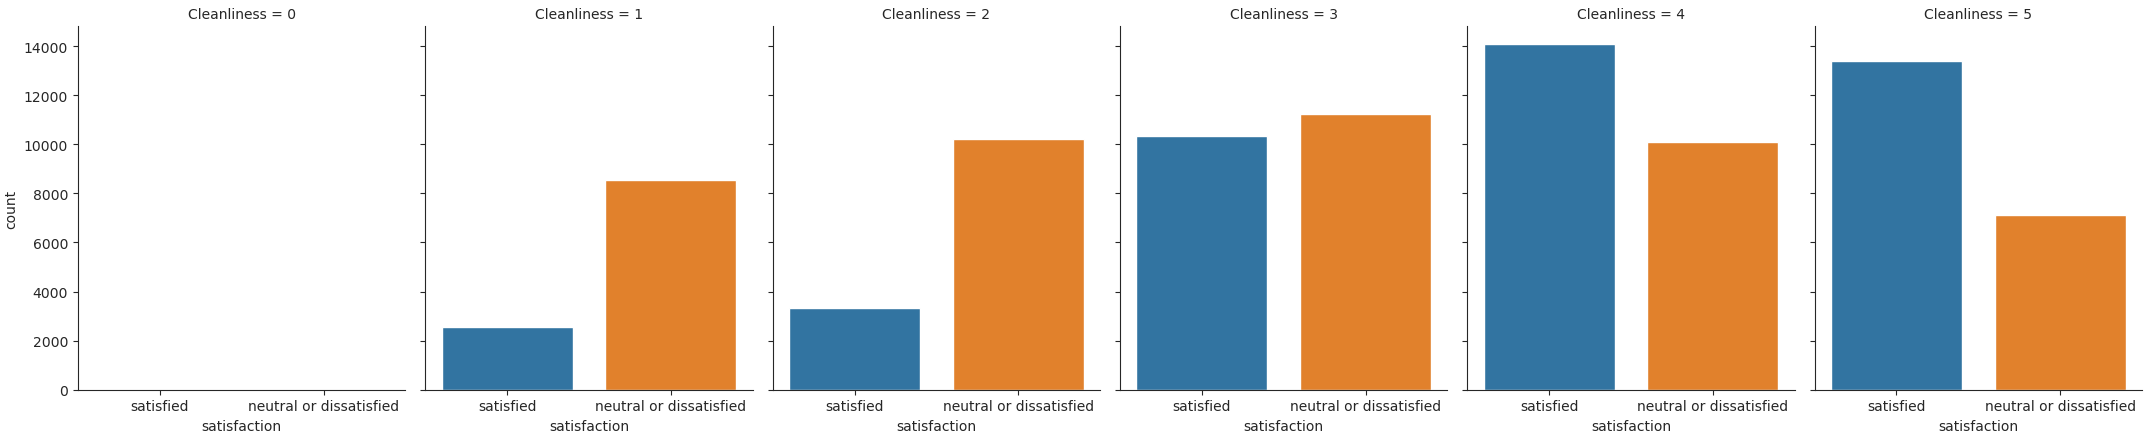

In [46]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df, kind="count", height=4.5, aspect=.8)

## Analysis:
### From the above count plot, we can make the following inferences:
### 1. A majority of the customers gave an average or above average rating (3/5, 4/5, 5/5) for the cleanliness of the ariplane. 
### 2. Though most of them have given a rating of above average, there's no significant difference in the number of "neutral or dissatisfied" and "satisfied" customers. This means that "Cleanliness" might not be an important measure for the customer to be satisfied or dissatisfied.

C:\Users\Shravani Soma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


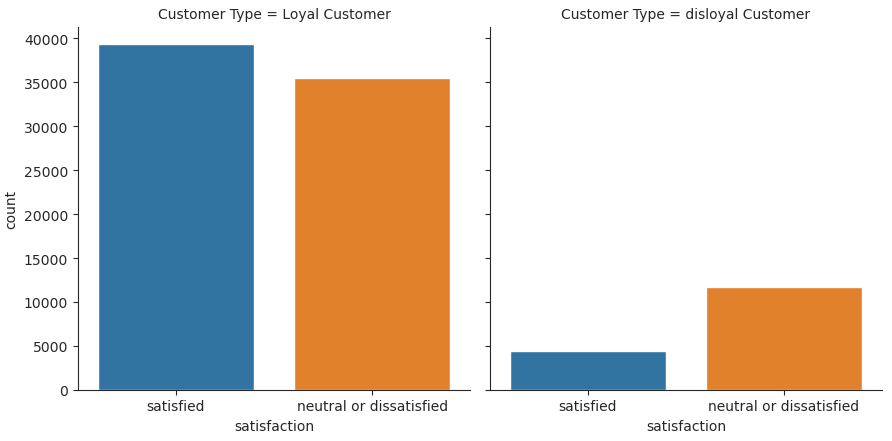

In [47]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=4.5, aspect=1.0)

## Analysis:
### From the above plots, the airlines have a lot of loyal customers which is a positive indicator that the customers are liking the services provided by the airlines. But, it is also noticeable that a lot of loyal customers are also "neutral or dissatisfied" with the overall experience. This raises the question that if the customers are really not satisfied with the experience, why are they returning to the same airlines?

C:\Users\Shravani Soma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


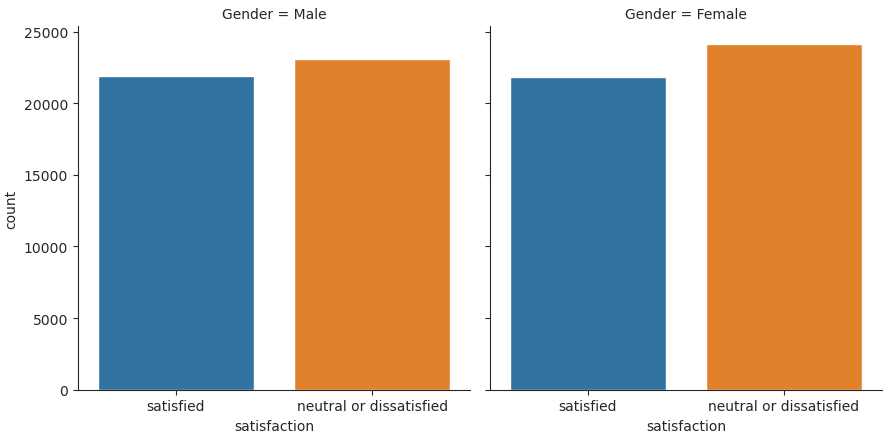

In [48]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=4.5, aspect=1.0)

## Analysis:
### This is a plot to understand the number of "satisfied" or "neutral or dissatisfied" customers based on the gender. We cannot conclude anything based on the gender as in both teh genders, the number of "satisfied" and "neutral or dissatisfied" customers are not far apart from each other.

<AxesSubplot:>

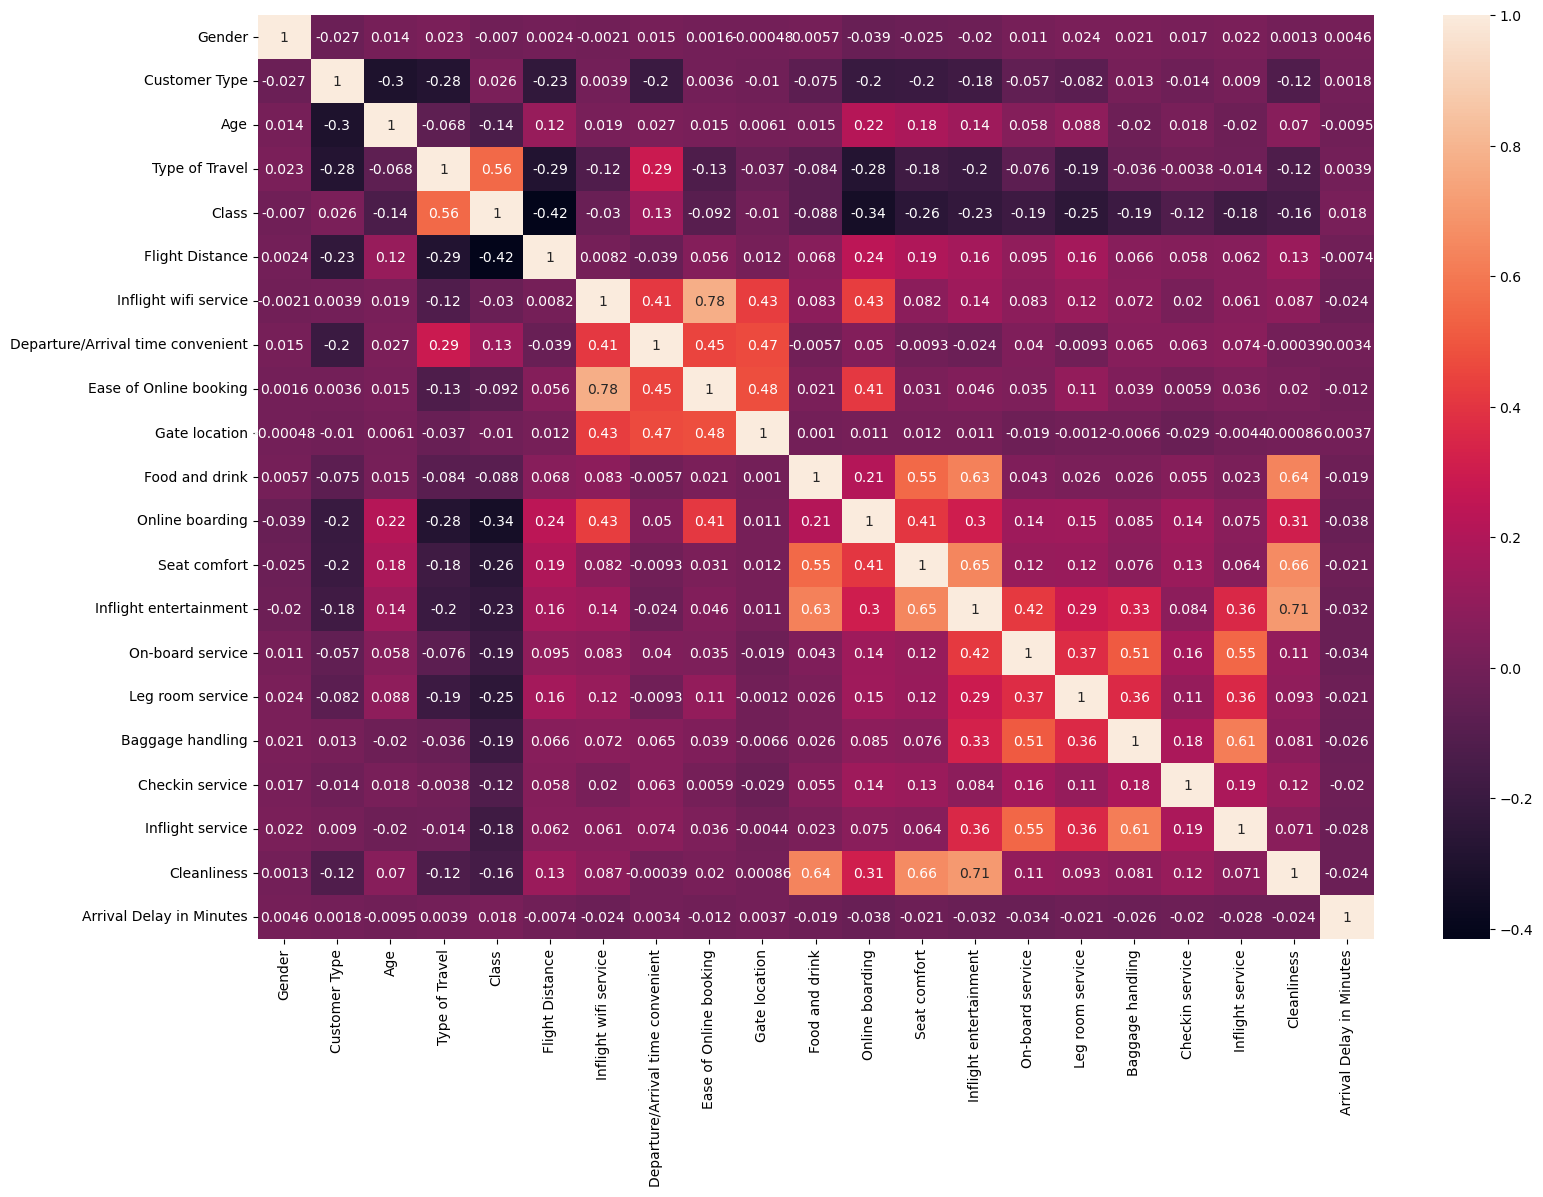

In [28]:
heat_plot = df.copy()
heat_plot['satisfaction'] = heat_plot['satisfaction'].replace(['neutral    or dissatisfied', 'satisfied'], [0, 1])
plt.figure(figsize=(18,12))
sns.heatmap(heat_plot.corr(), annot=True)